In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,100)

def f(x):
    return 4*x**2 - 3 * x + 7

def df(x):
    return 8 * x - 3 

$$
\begin{eqnarray}
f(x)&=&4x^2-3x+7 \\
    &=& (2x)^2 - 2\cdot(2x)\cdot\frac{3}{4} + (\frac{3}{4})^2 - (\frac{3}{4})^2 + 7 \\
    &=& (2x - \frac{3}{4})^2 + \frac{103}{16} 
\end{eqnarray}
$$    
The minimal is at $x_0=\frac{3}{8}=0.375$ and the minimal value of $f(x_0)=-\frac{103}{16}=6.4375$ 

Mininum occurs at:  0.38591749510943263
Number of iterations:  61
Minimal value is:  6.437976766797858


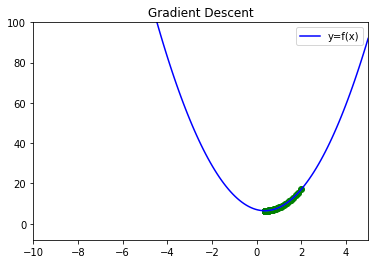

In [22]:
x_new = 2
alpha = 0.01
epsilon = 0.0001
max_iters = 100000

x_list, y_list = [x_new],[f(x_new)]
for _i in range(max_iters):
    x_prev = x_new
    x_new = x_prev - alpha*df(x_prev)
    
    x_list.append(x_new)
    y_list.append(f(x_new))
    
    step = f(x_new) - f(x_prev)
    if abs(step) <= epsilon:
        break
    
print ("Mininum occurs at: ", str(x_new))
print ("Number of iterations: ", str(len(x_list)))
print ("Minimal value is: ", str(f(x_new)))

plt.scatter(x_list, y_list, c="g")
plt.plot(x_list, y_list)
plt.plot(x,f(x),c="b",label='y=f(x)')
plt.title("Gradient Descent")
plt.grid
plt.xlim(-10,5)
plt.ylim(-8,100)
plt.legend()
plt.show()

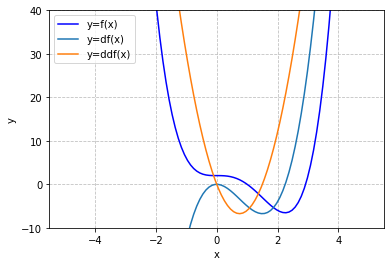

In [10]:
def f(x):
    return x**4 - 3*x**3 + 2

def df(x):
    return 4*x**3 - 9*x**2

def ddf(x):
    return 12*x**2 - 18*x

plt.plot(x,f(x),c="b",label='y=f(x)')
plt.plot(x,df(x),label='y=df(x)')
plt.plot(x,ddf(x),label='y=ddf(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha=.8,linestyle='--')
plt.ylim(-10,40)
plt.legend()
plt.show()

Local mininum occurs at:  2.2877248517791187
Minimal value is:  -6.528235052624456
Number of iterations:  12


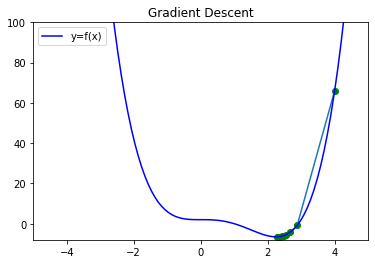

In [11]:
x_new = 4
alpha = 0.01
epsilon = 0.01
max_iters = 100000

x_list, y_list = [x_new],[f(x_new)]
for _i in range(max_iters):
    x_prev = x_new
    x_new = x_prev - alpha*df(x_prev)
    
    x_list.append(x_new)
    y_list.append(f(x_new))
    
    step = f(x_new) - f(x_prev)
    if abs(step) <= epsilon:
        break
    
print ("Local mininum occurs at: ", str(x_new))
print ("Minimal value is: ", str(f(x_new)))
print ("Number of iterations: ", str(len(x_list)))

plt.scatter(x_list, y_list, c="g")
plt.plot(x_list, y_list)
plt.plot(x,f(x),c="b",label='y=f(x)')
plt.title("Gradient Descent")
plt.grid
plt.xlim(-5,5)
plt.ylim(-8,100)
plt.legend()
plt.show()

In [5]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import itertools
%matplotlib notebook

In [17]:
A = np.matrix([[3.,2.],[2.,6.]])
b = np.matrix([[2.],[-8.]])
c = 0.0

In [18]:
def f(x,A,b,c):
    return float(0.5*x.T*A*x - b.T*x + c)
def paraboloid(A,b,c):
    fig = plt.figure(figsize=(8,5))
    qf  = fig.gca(projection='3d')
    size= 40
    x1  = list(np.linspace(-3,3,size))
    x2  = list(np.linspace(-3,3,size))
    x1, x2 = np.meshgrid(x1,x2)
    zs = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]],[x2[i,j]]])
            zs[i,j] = f(x,A,b,c)
    qf.plot_surface(x1,x2,zs,rstride=1,cstride=1,cmap=cm.rainbow,linewidth=0)
    fig.show()
    return x1, x2, zs

<IPython.core.display.Javascript object>


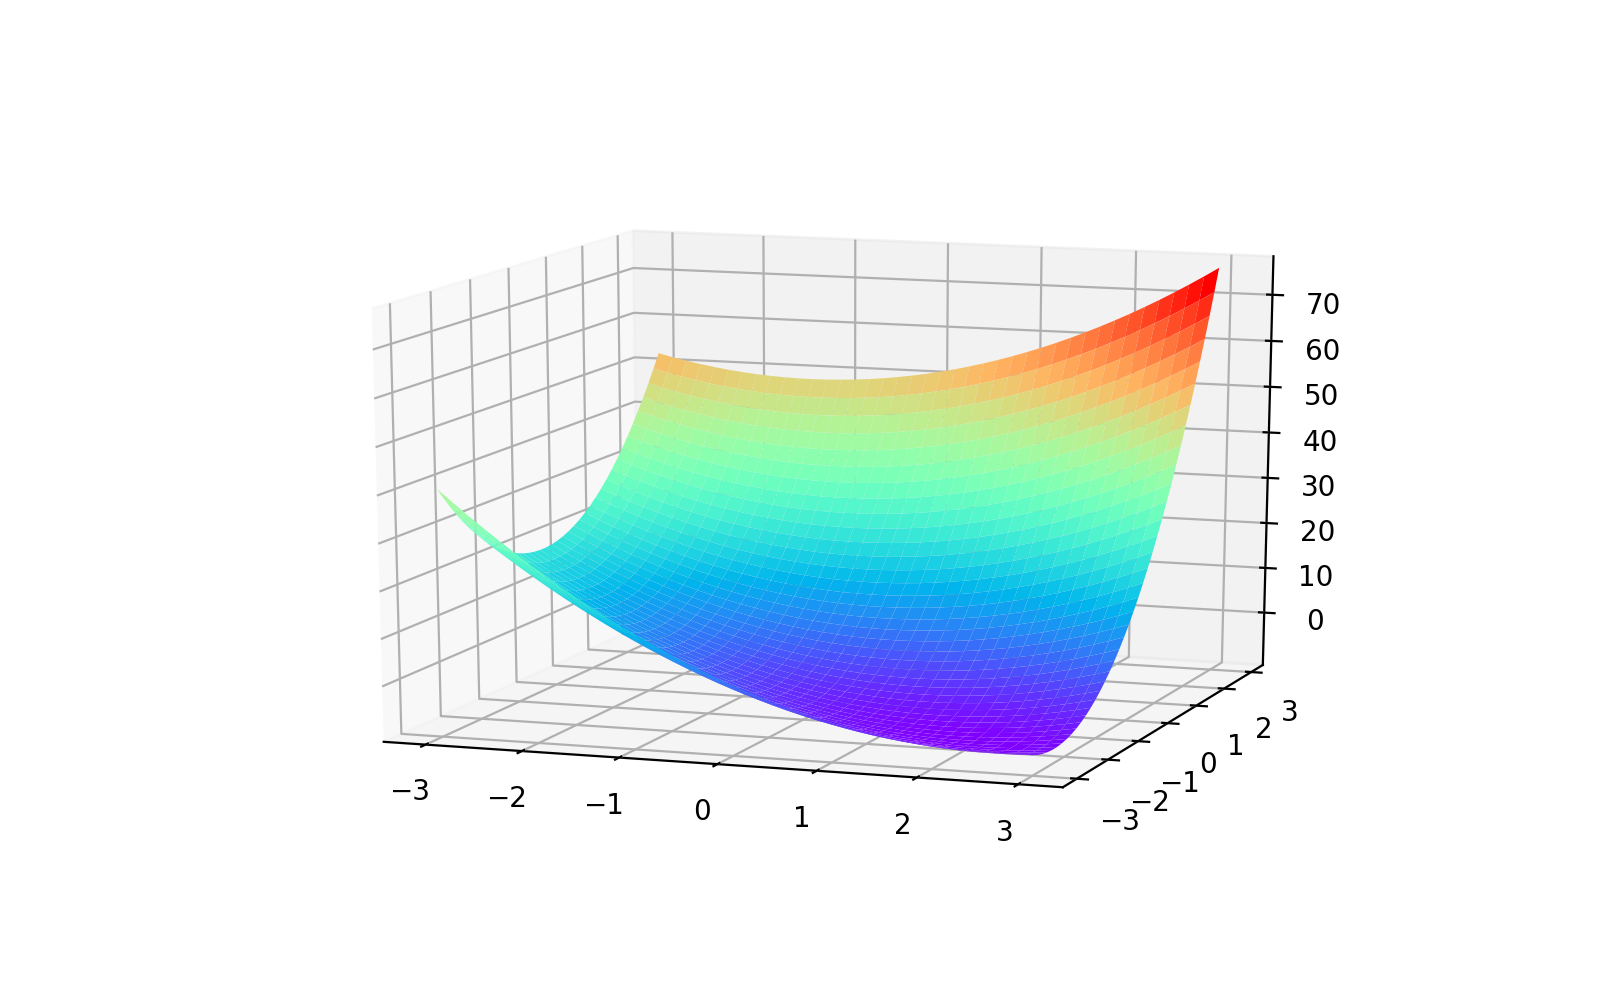

In [19]:
x1,x2,zs = paraboloid(A,b,c)

In [20]:
def contoursteps(x1,x2,zs,steps=None):
    fig = plt.figure(figsize=(8,8))
    levels = [-9.9,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,10]
    cp = plt.contour(x1,x2,zs,levels)
    plt.clabel(cp,inline=1,fontsize=8)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0],steps[:,1],'-o')
    fig.show()

<IPython.core.display.Javascript object>


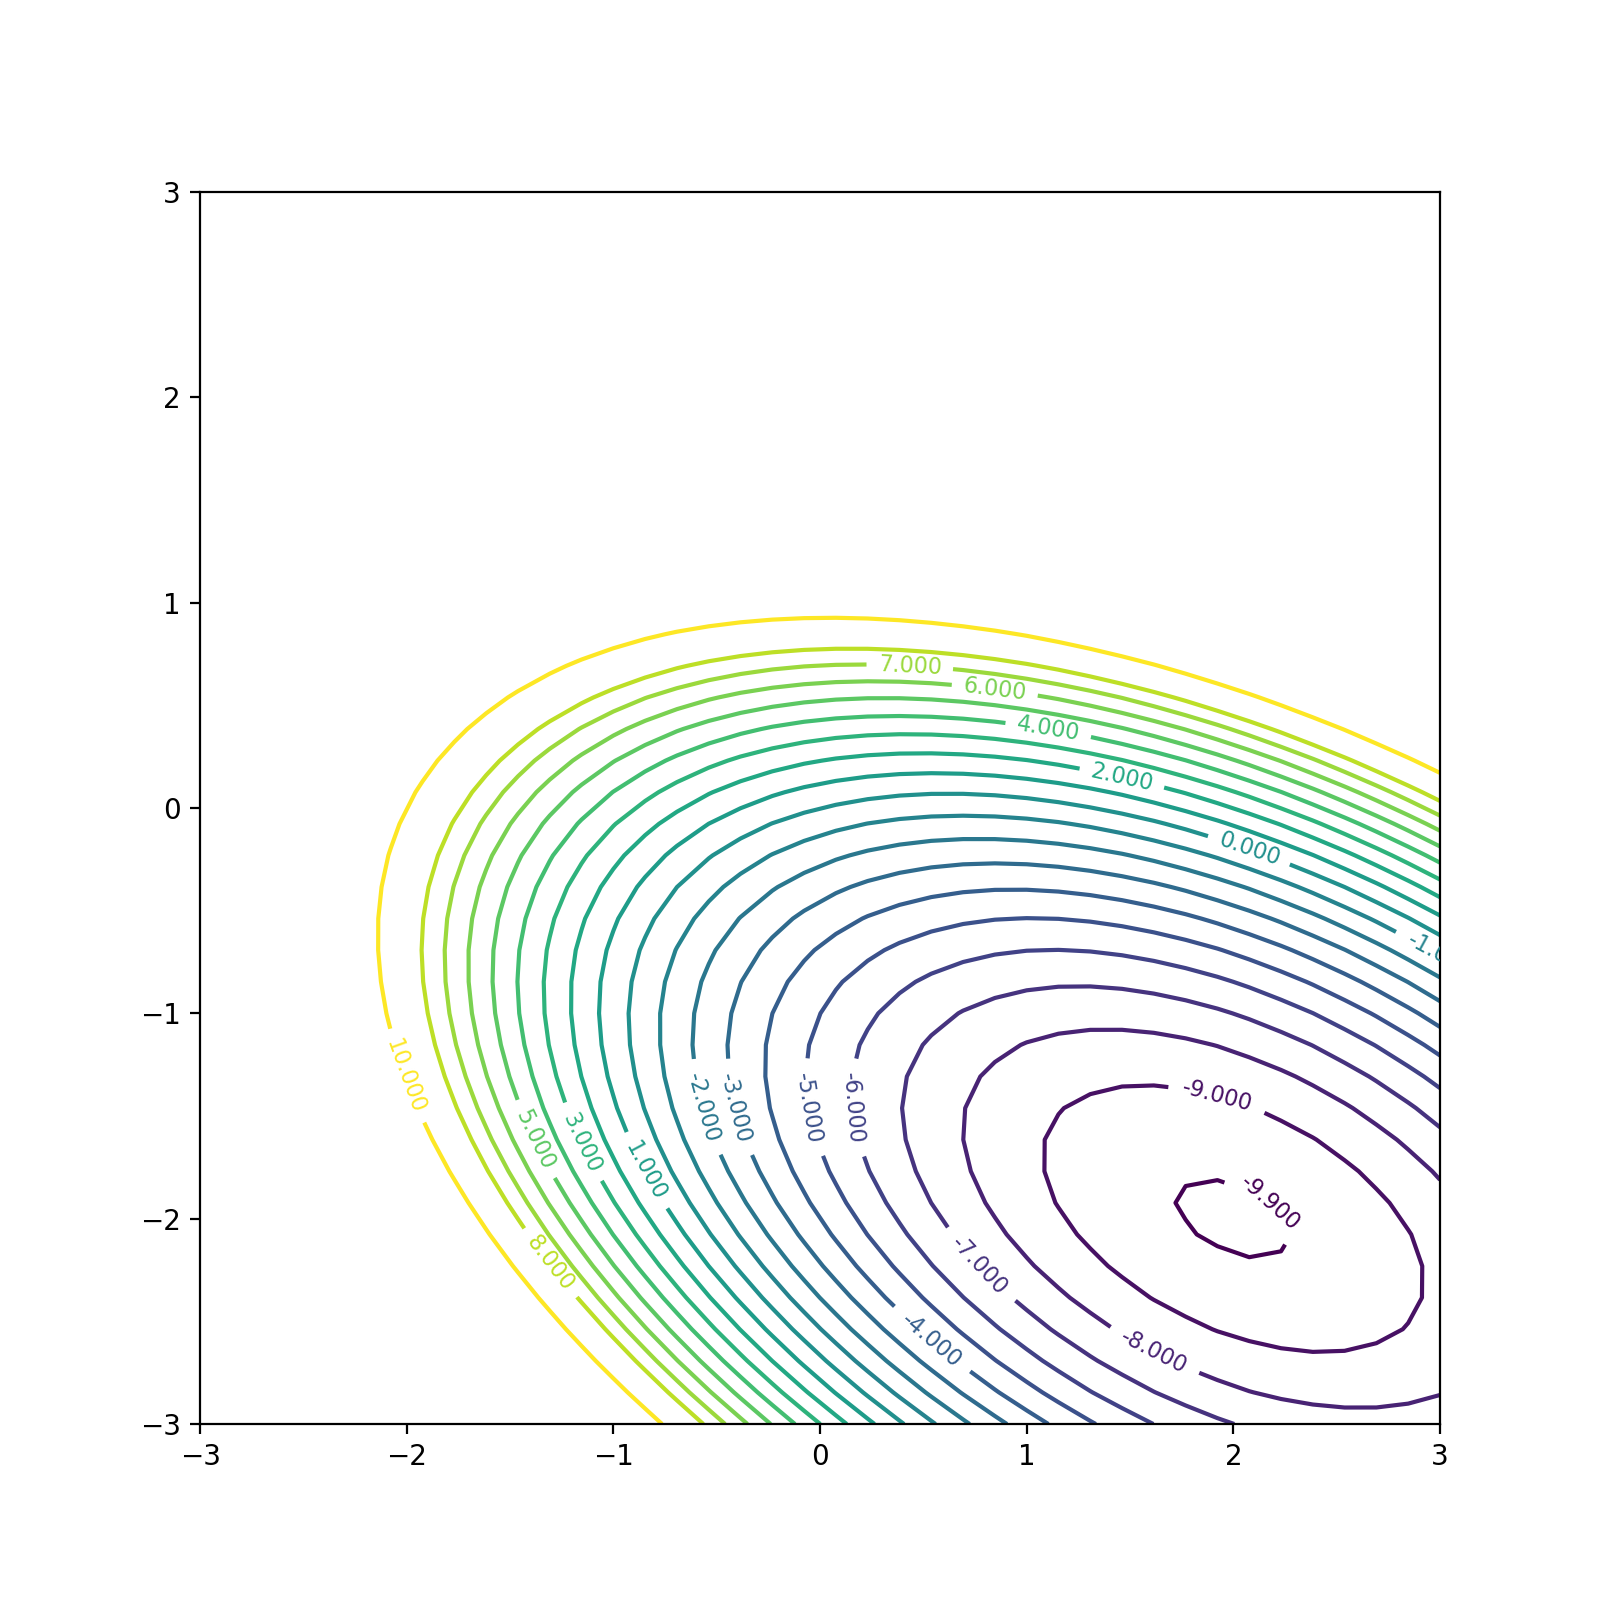

In [21]:
contoursteps(x1,x2,zs)

The minimal is at (-2,2) and its value is -10.

In [160]:
x = np.matrix([[-1.],[2.]])
steps = [(-1.,2.)]
i = 0
imax = 1000
eps = 0.001
alpha = 0.01
r = b - A * x
delta = r.T * r
delta0 = delta
while i< imax and delta > eps**2 * delta0:
    x = x + alpha*r
    steps.append((x[0,0],x[1,0]))
    r = b - A * x
    delta = r.T * r
    i +=1

<IPython.core.display.Javascript object>


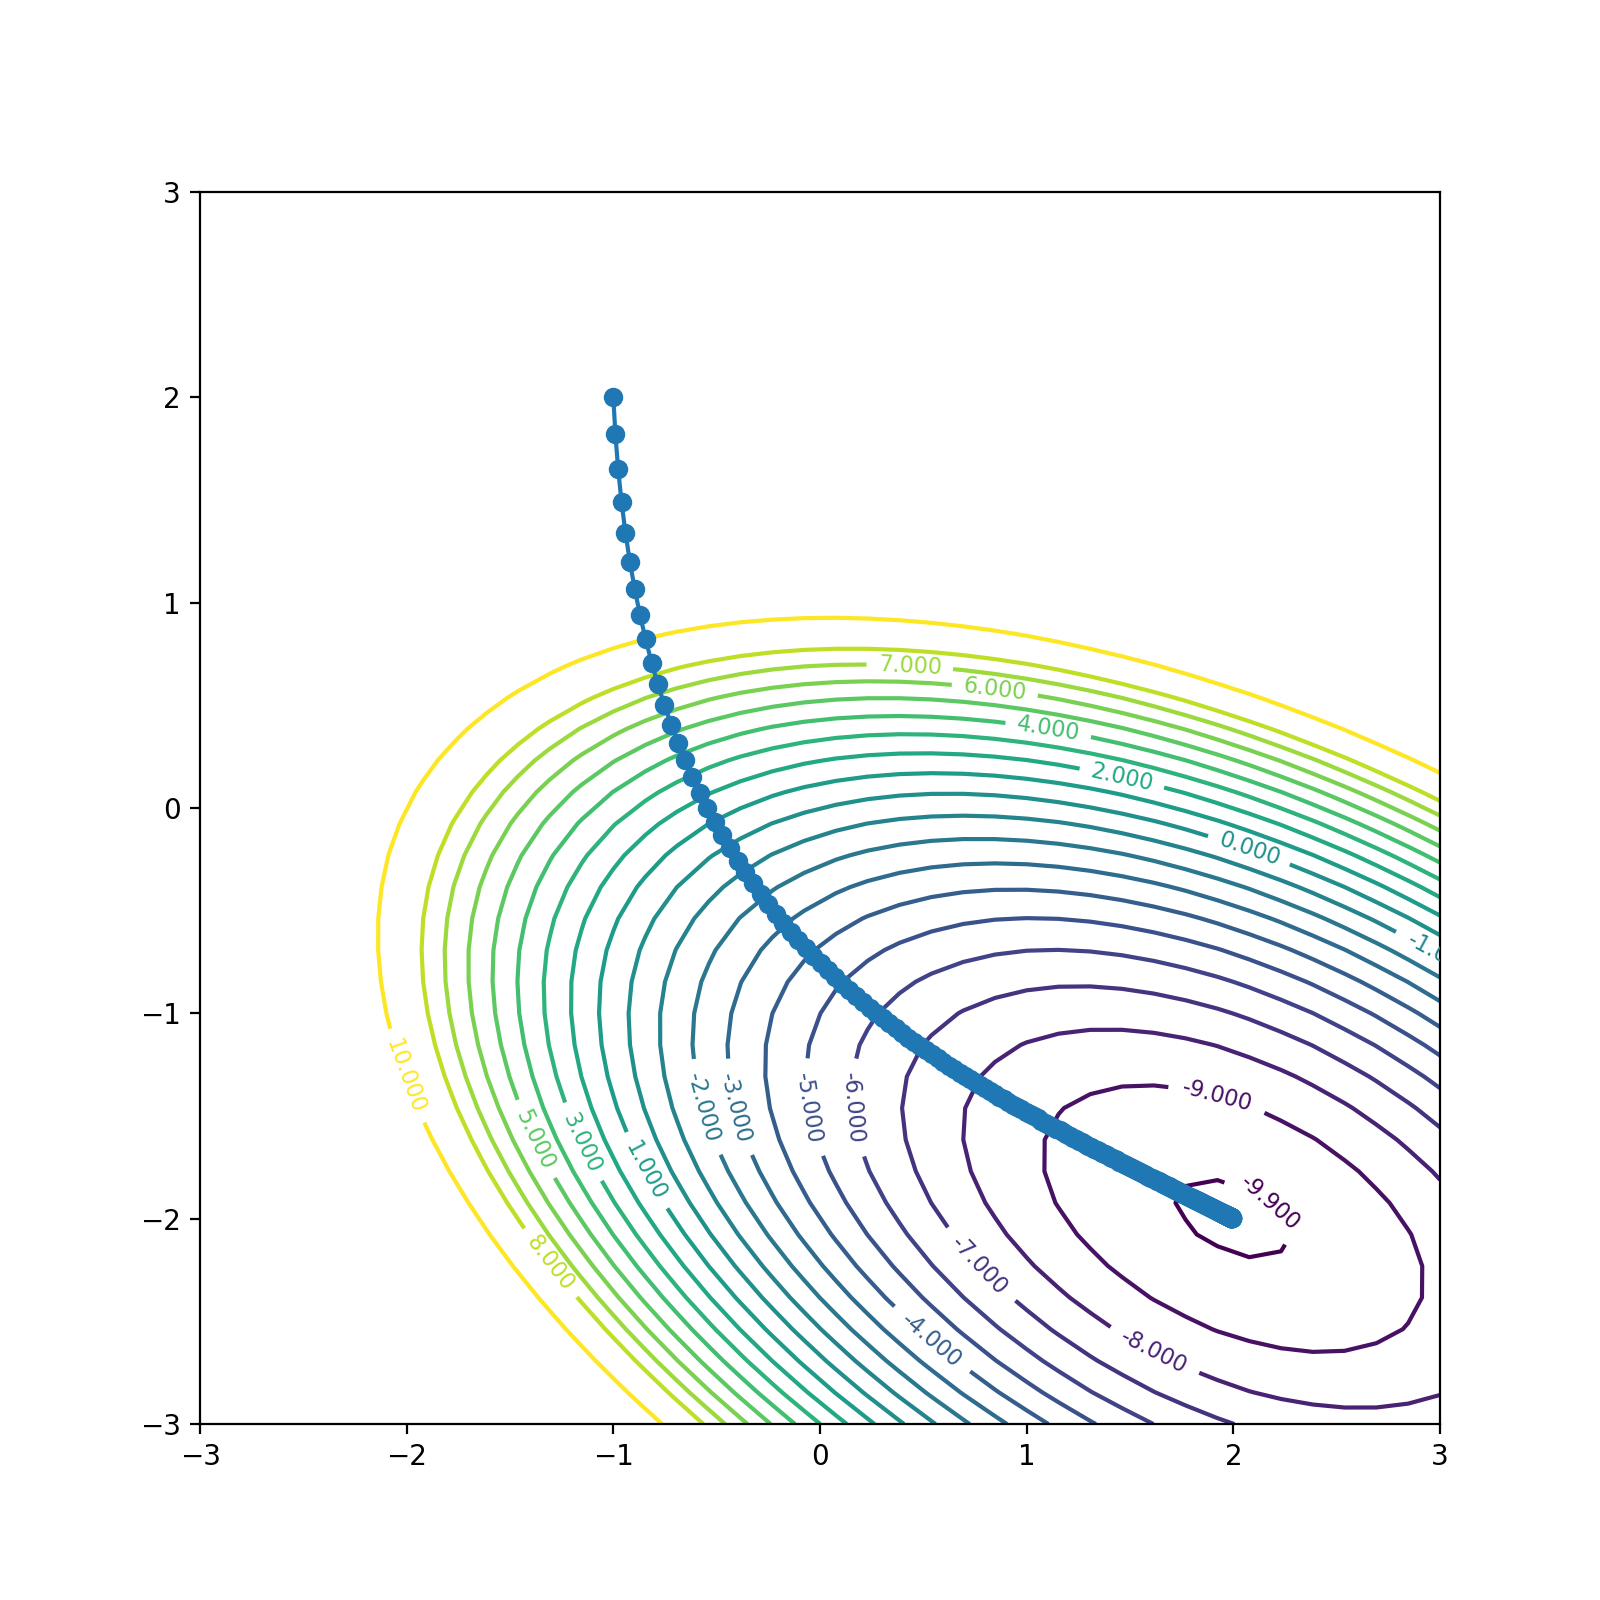

Local mininum occurs at: [[ 1.99206236]
 [-1.99603118]]
Number of iterations: 308


In [161]:
contoursteps(x1,x2,zs,steps)
print ("Local mininum occurs at: "+ str(x))
print ("Number of iterations: "+ str(i))

The quadratic form here is $\frac{1}{2}(x_1,x_2)\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}=\frac{1}{2}(x^2_1+x^2_2)$

<IPython.core.display.Javascript object>


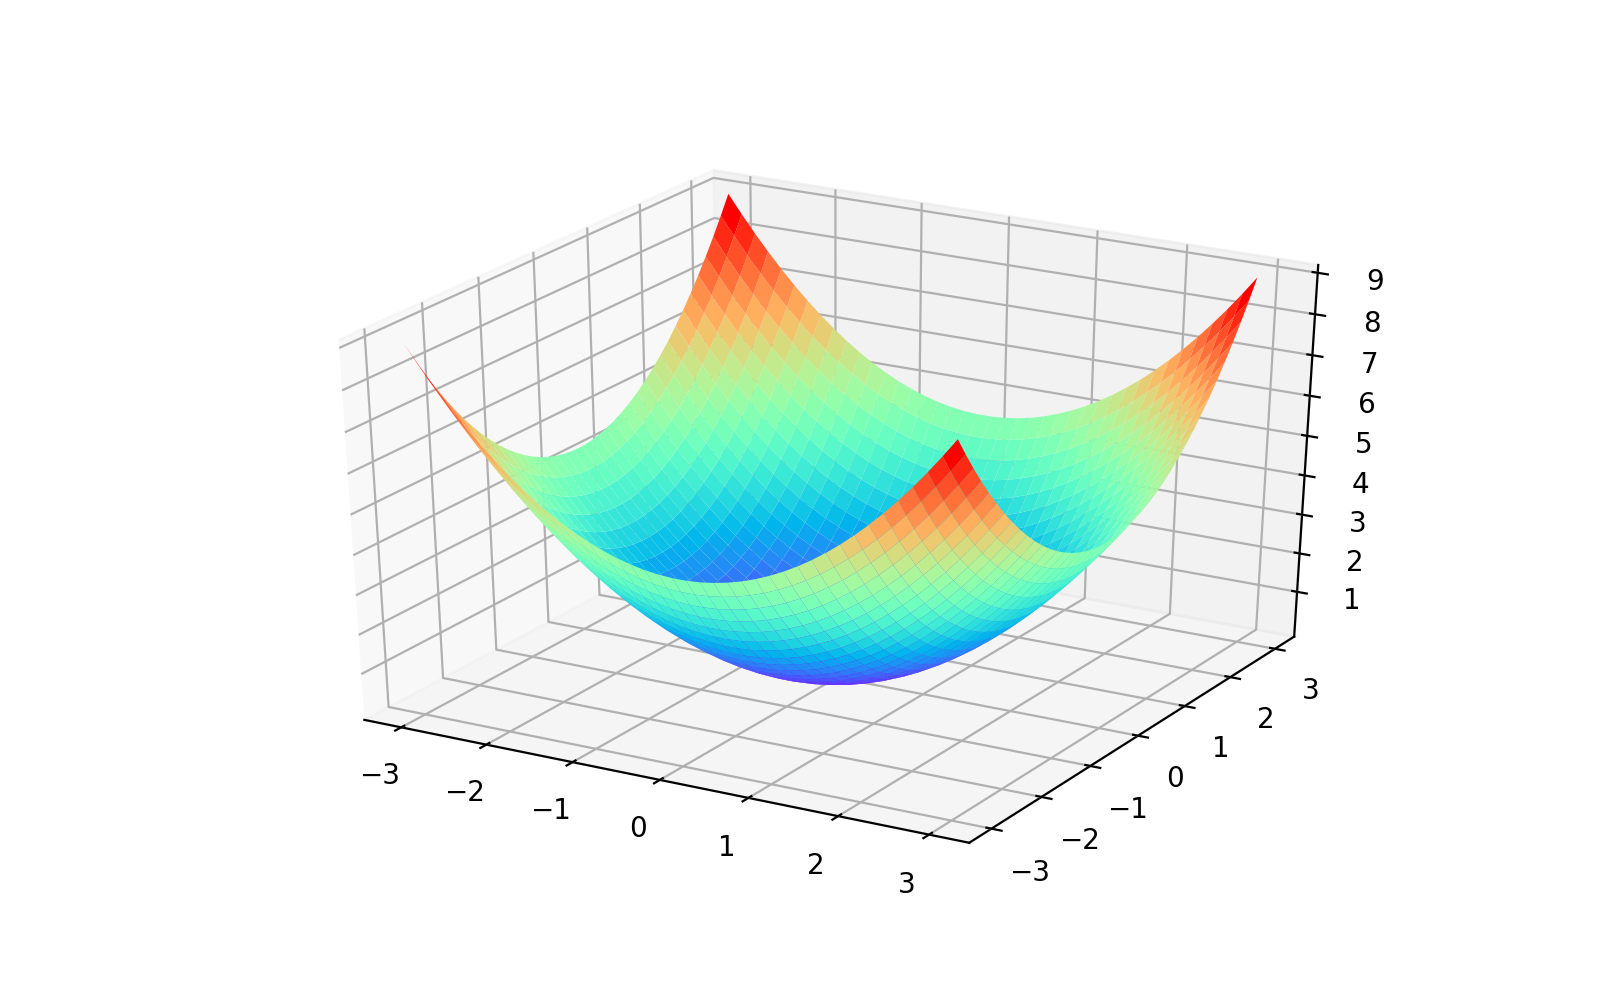

In [162]:
Around = np.matrix([[1,0],[0,1]])
bround = np.matrix([[0],[0]])
cround = 0
x1,x2,zs=paraboloid(Around, bround,cround)

<IPython.core.display.Javascript object>


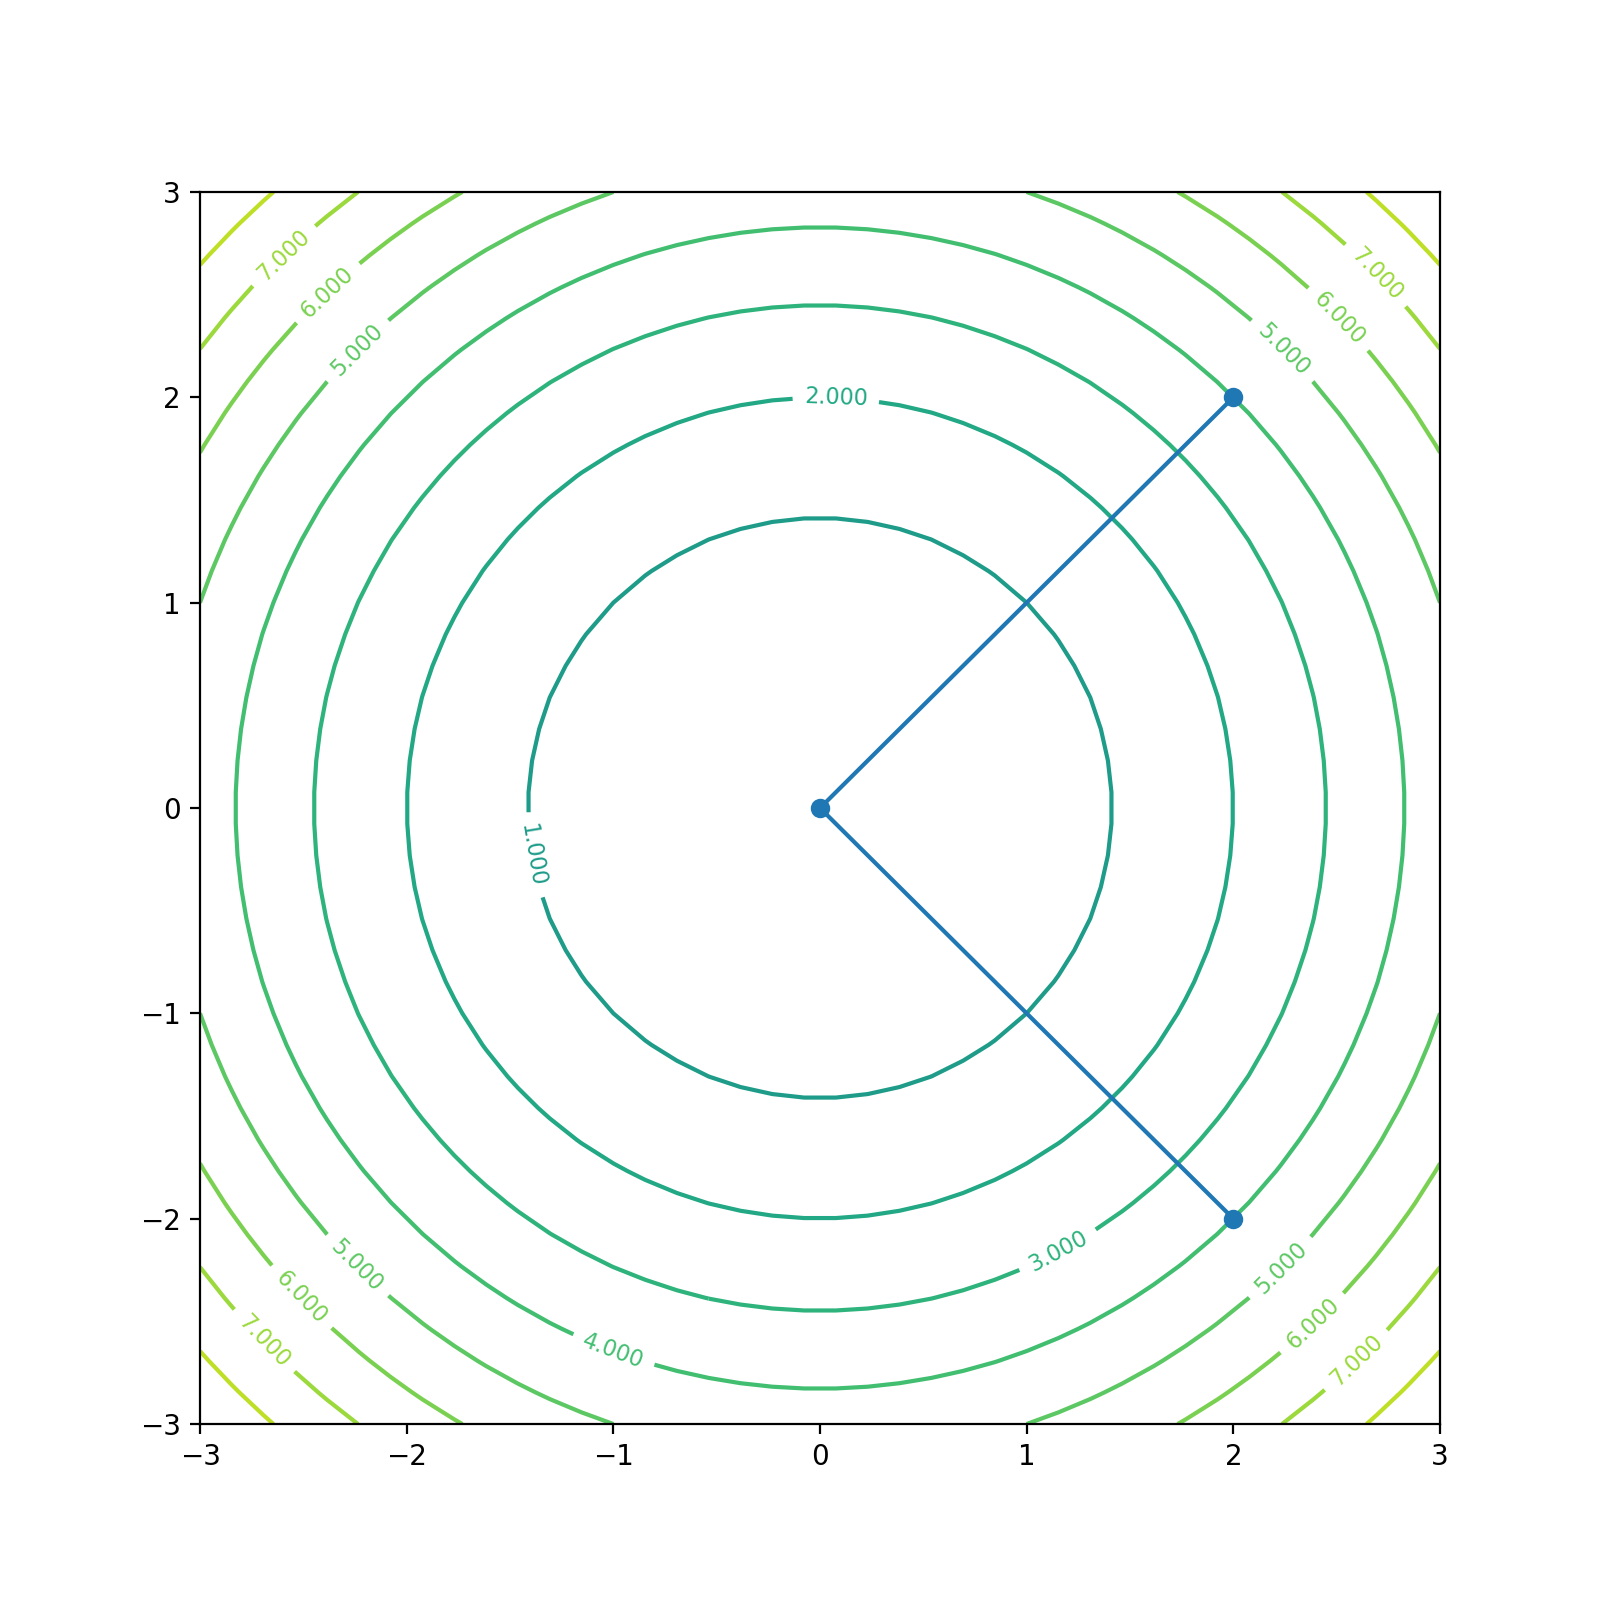

In [163]:
va = np.matrix([[2],[2]])
vb = np.matrix([[2],[-2]])
contoursteps(x1,x2,zs,[(va[0,0],va[1,0]),(0,0),(vb[0,0],vb[1,0])])

In [164]:
float(va.T * vb) 

0.0

$\vec{v_a}$ and $\vec{v_b}$ are orthogonal vectors and conjugate with respect to identity matrix
$$
\vec{v_a}\cdot\vec{v_b} = 0
$$

<IPython.core.display.Javascript object>


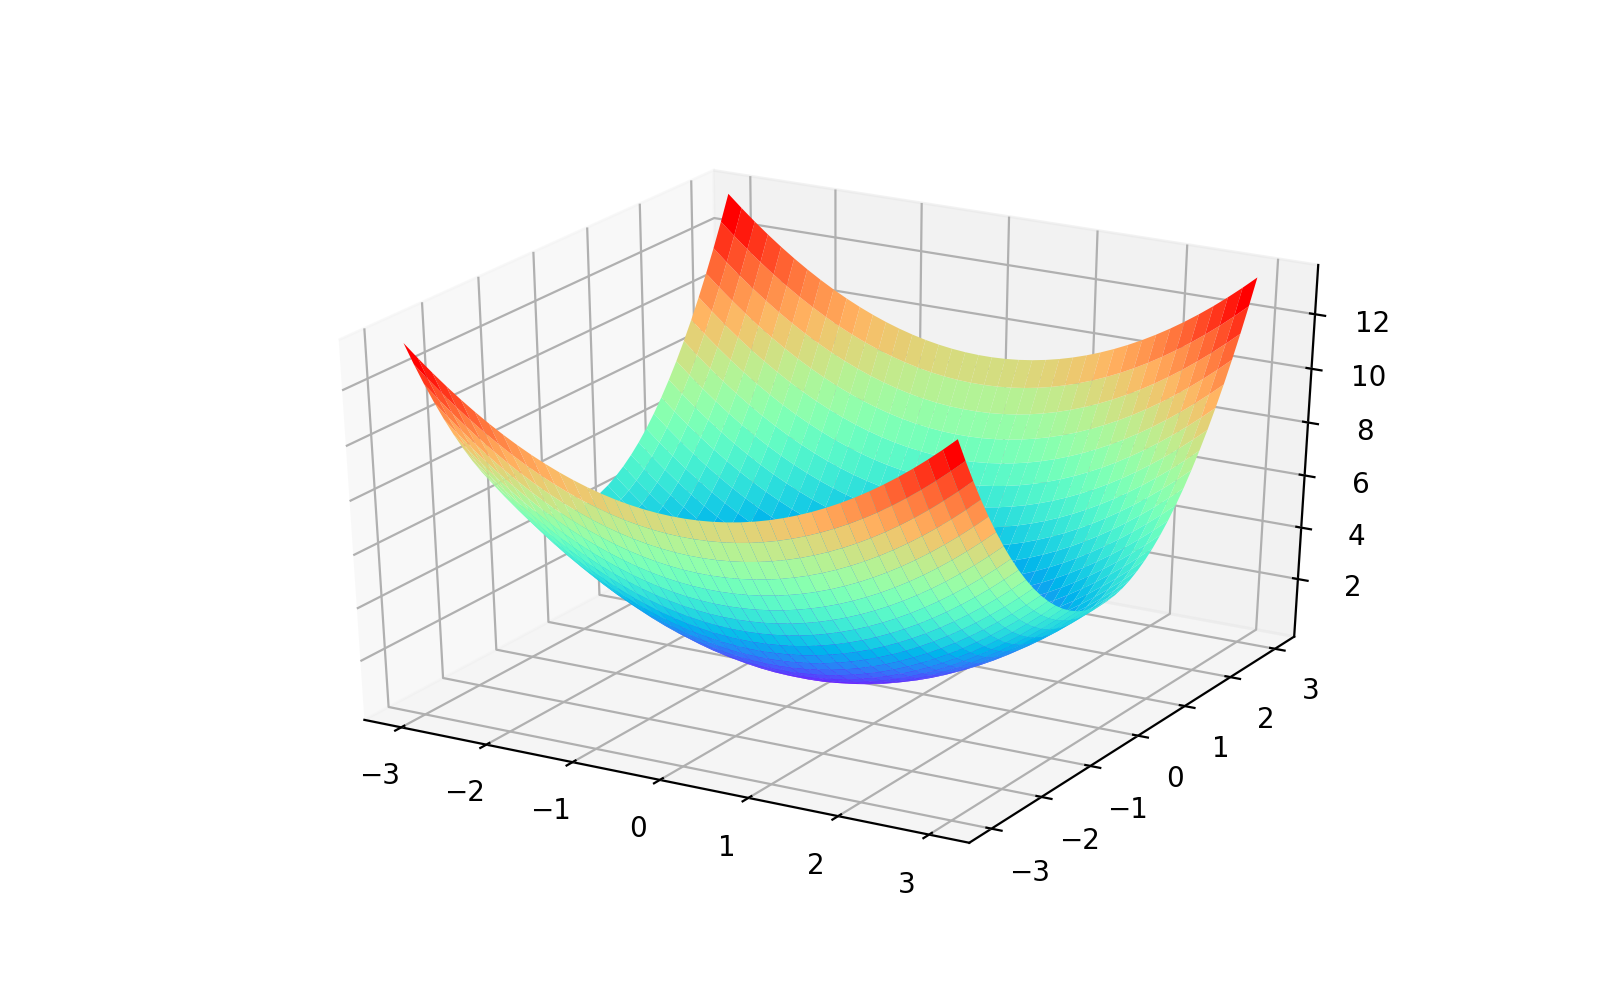

In [165]:
Ascaled = np.matrix([[1,0],[0,2]])
bscaled = np.matrix([[0],[0]])
cscaled = 0
x1,x2,zs = paraboloid(Ascaled, bscaled, cscaled)

<IPython.core.display.Javascript object>


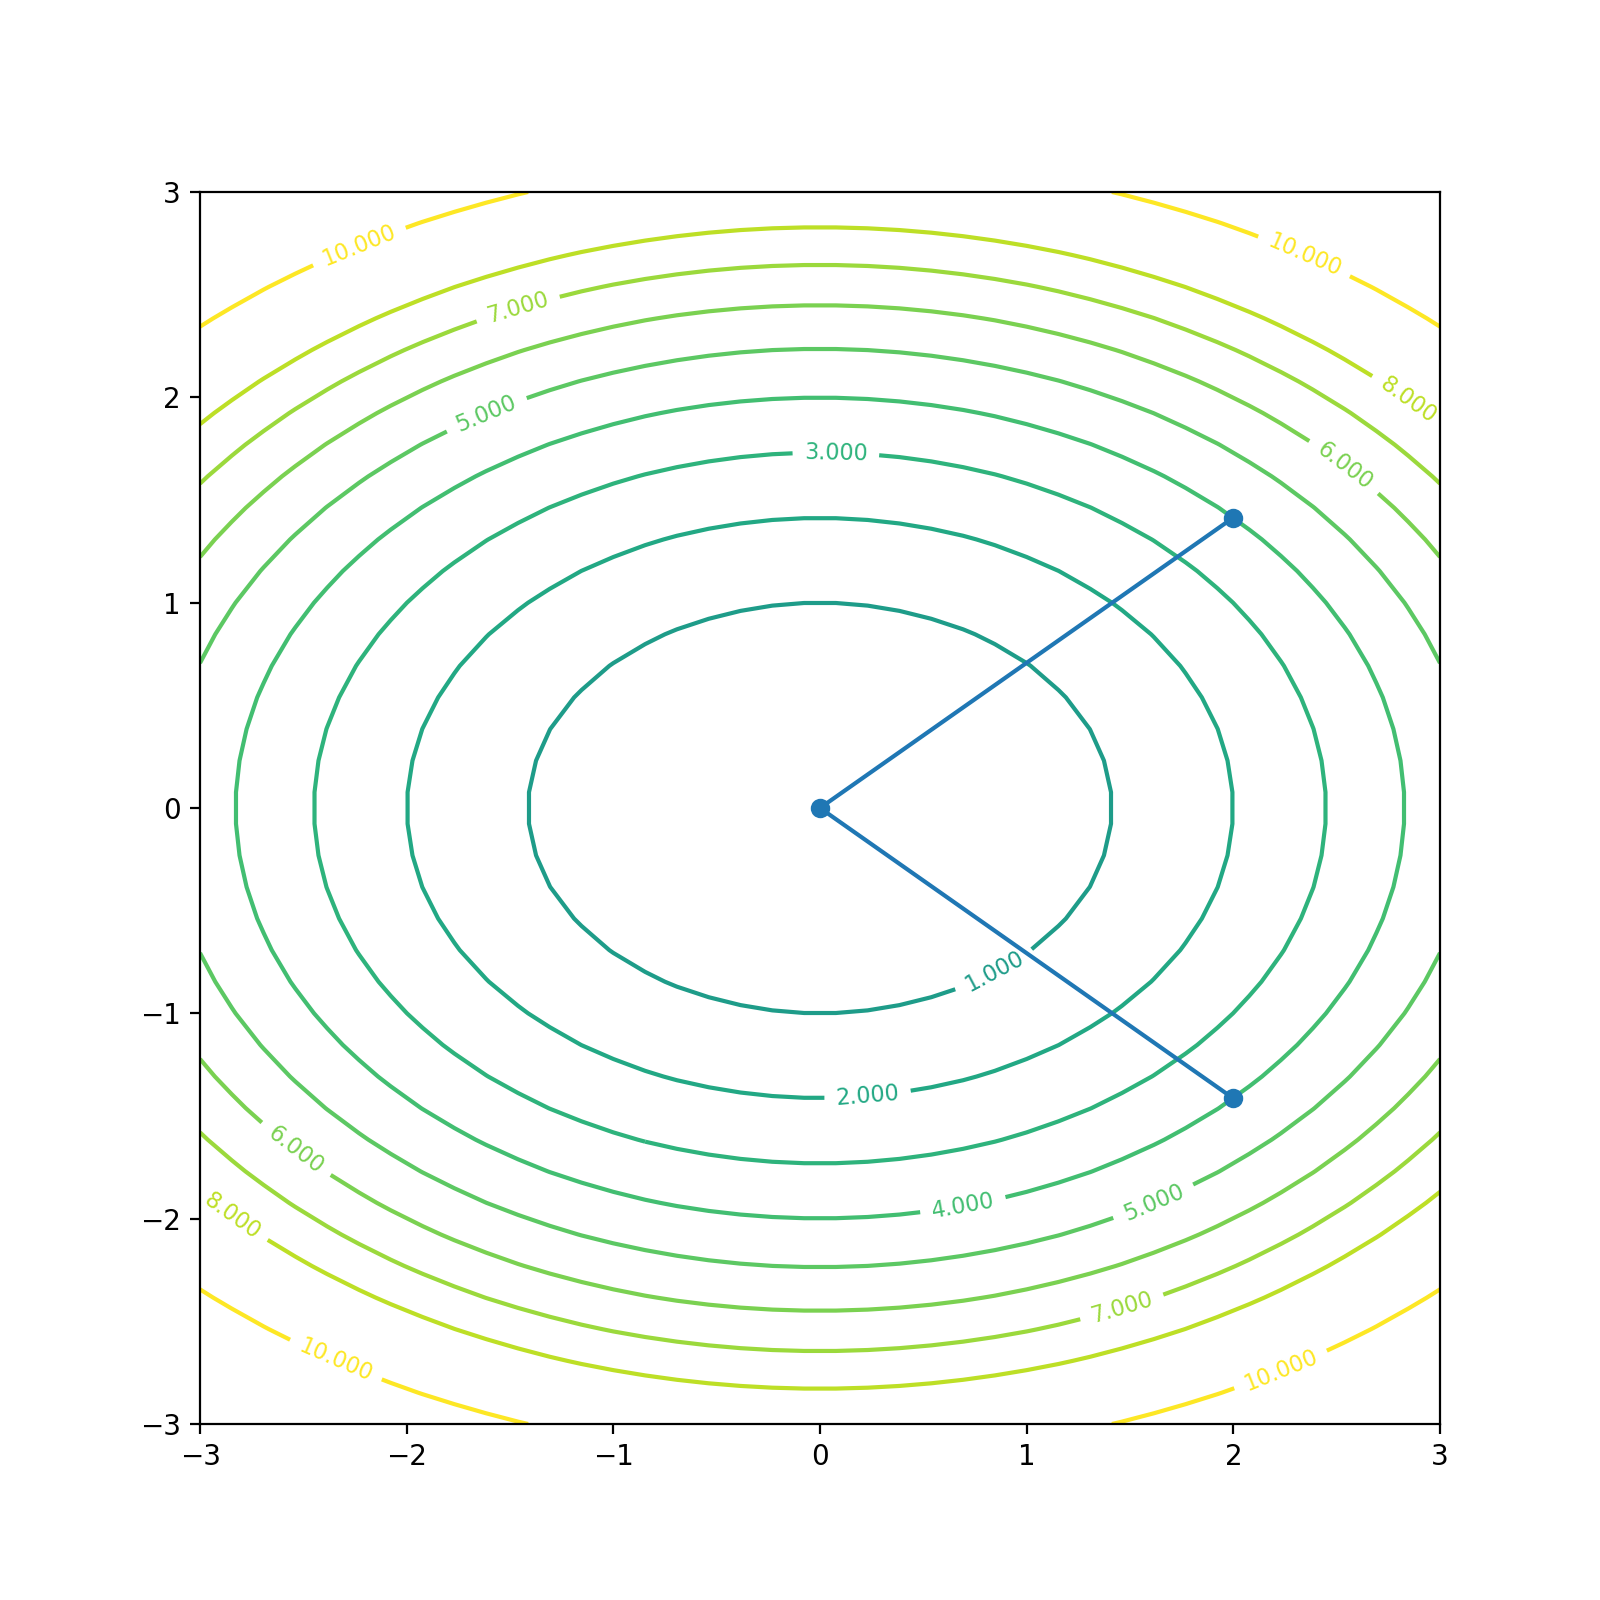

In [166]:
va = np.matrix([[2],[np.sqrt(2)]])
vb = np.matrix([[2],[-np.sqrt(2)]])
contoursteps(x1,x2,zs,[(va[0,0],va[1,0]),(0,0),(vb[0,0],vb[1,0])])

now $\vec{v_a}$ and $\vec{v_b}$ are no longer orthogonal to each other, but they are conjugate vectors with respect to the matrix $A_{scaled}$, namely,
$$
\vec{v_a}\cdot A \cdot \vec{v_b} = 0
$$

In [167]:
print(float(va.T * vb))

print(float(va.T * Ascaled * vb))

1.9999999999999996
-8.881784197001252e-16


<IPython.core.display.Javascript object>


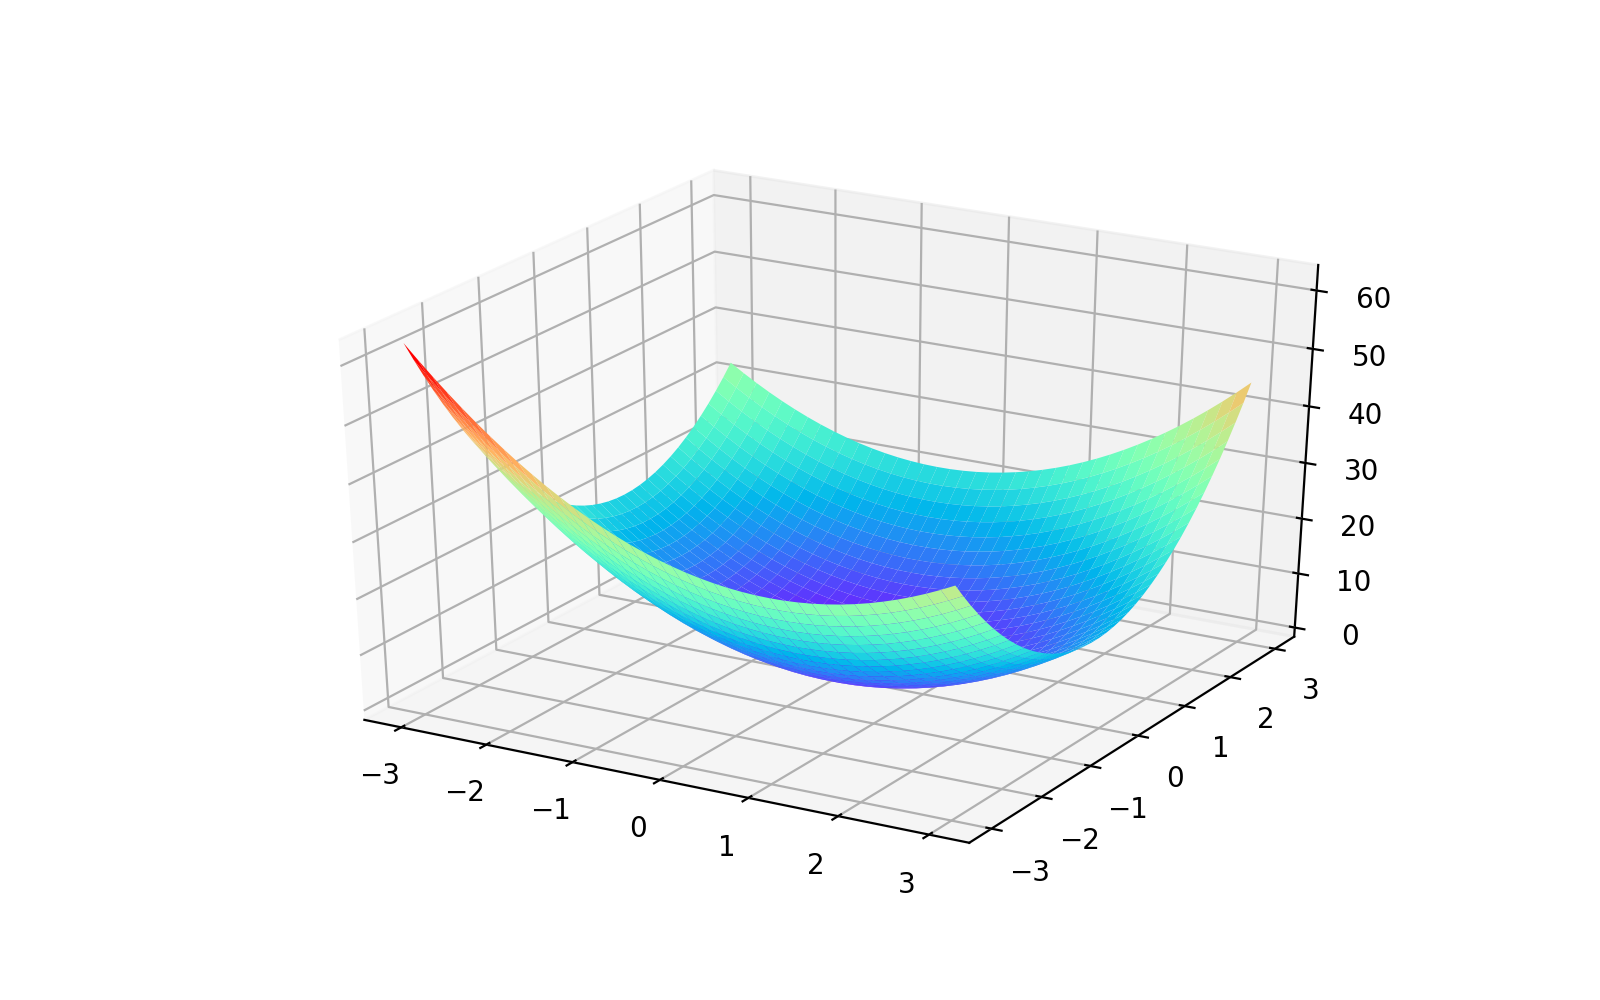

In [168]:
A = np.matrix([[4.,1.],[1.,6.]])
b = np.matrix([[1.],[2.]])
c = 0.0
x1, x2, zs = paraboloid(A,b,c)

<IPython.core.display.Javascript object>


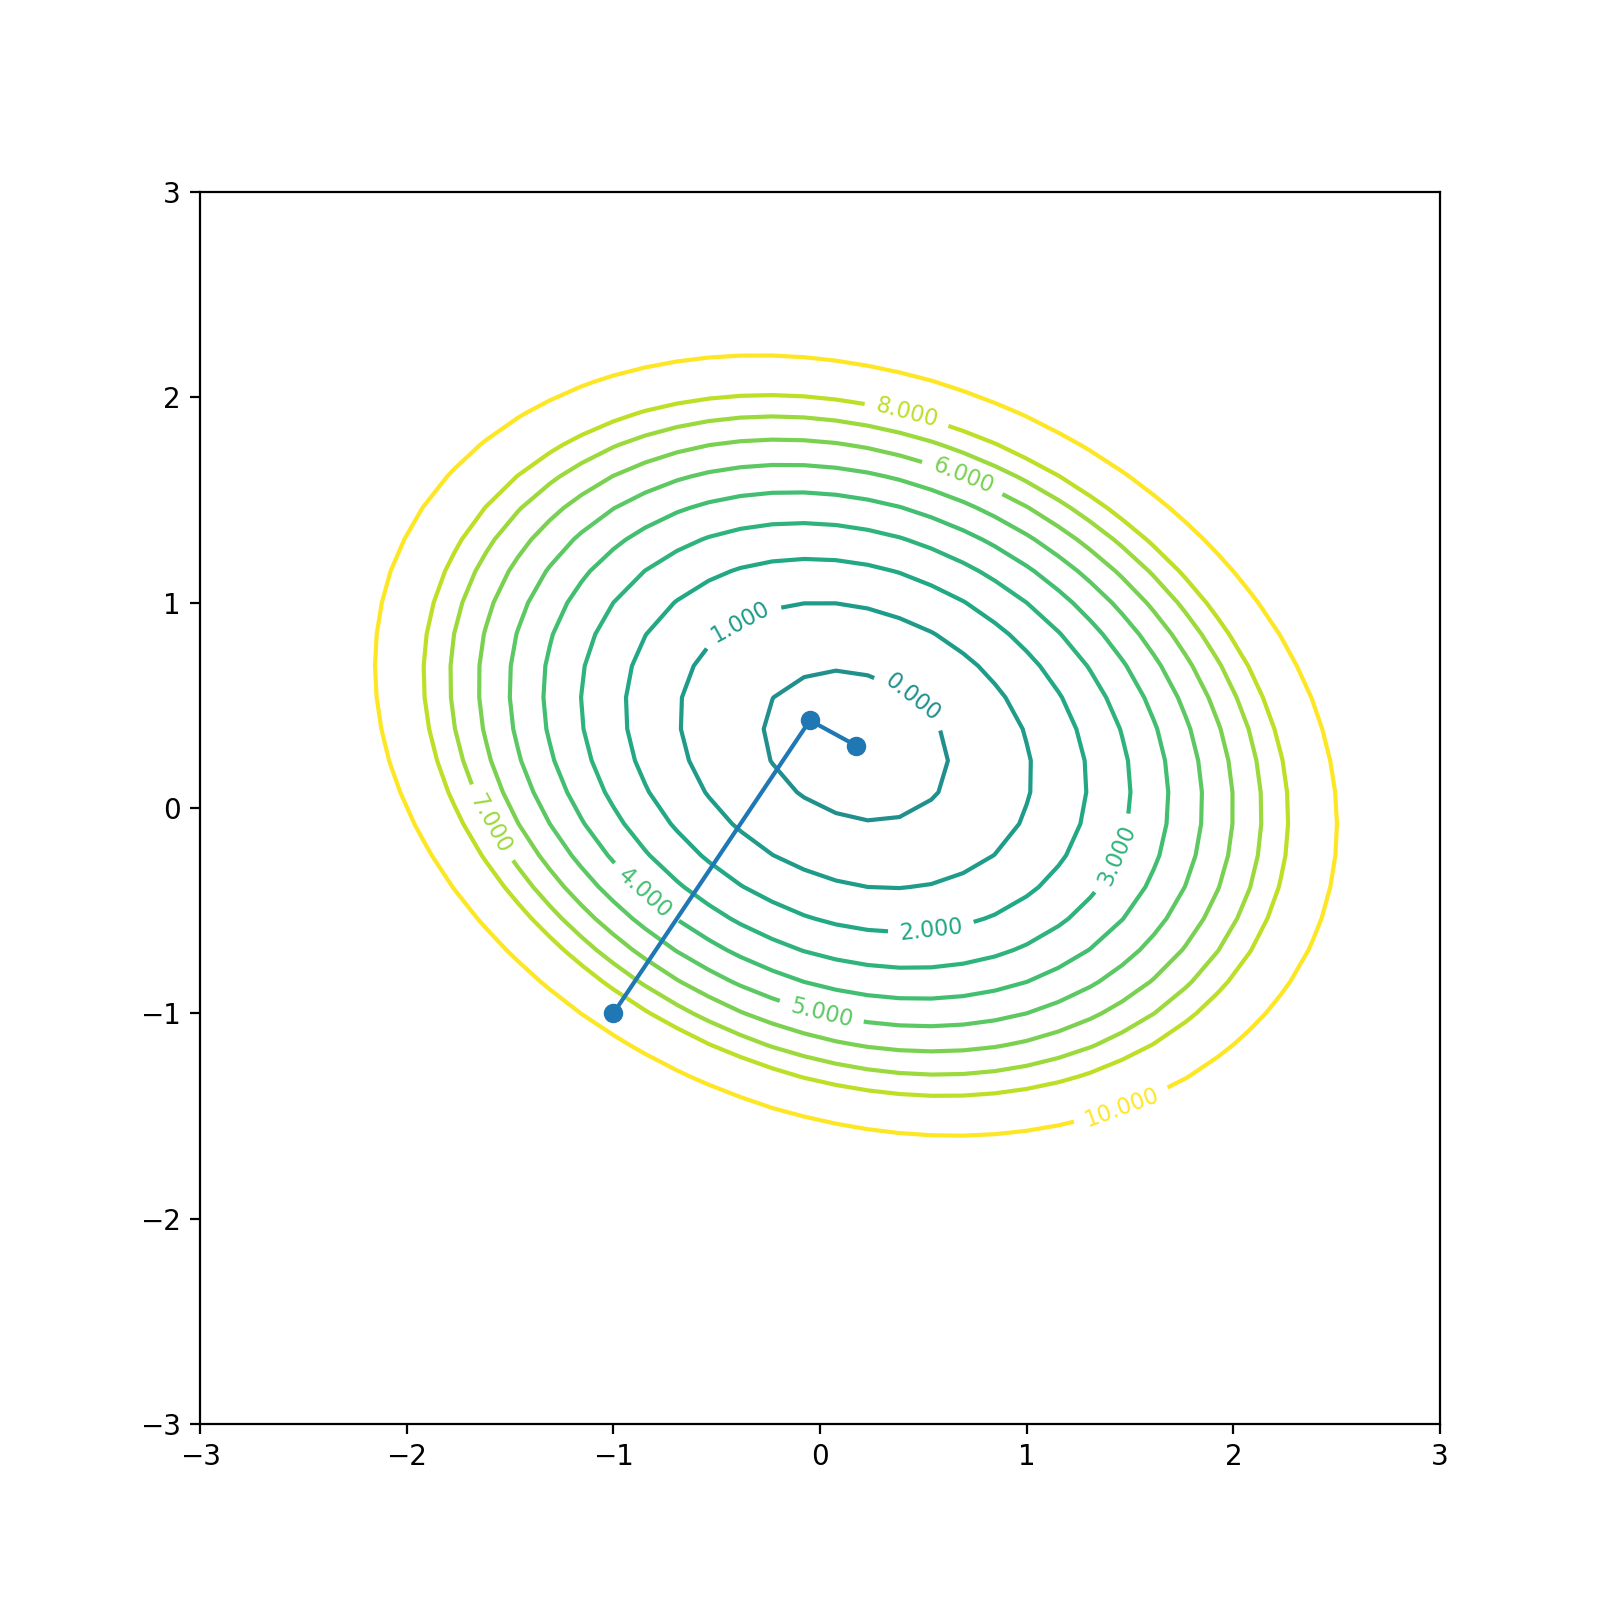

In [191]:
x = np.matrix([[-1.],[-1.]])
steps = [(-1.,-1.)] # steps is a list and the tuple (-2,-2) is the initial position
i = 0
imax = 3
eps = 0.01
r = b - A * x
p = r
deltanew = r.T * r
delta0 = deltanew
while i < imax and deltanew > eps**2 * delta0:
    alpha = float(deltanew / float(p.T * (A * p)))
    x = x + alpha * p
    steps.append((x[0,0],x[1,0]))
    r = r - alpha * (A * p)
    deltaold = deltanew
    deltanew = r.T * r
    beta = float(deltanew / float(deltaold))
    p = r + beta * p
    i += 1
    
contoursteps(x1, x2, zs, steps)


<IPython.core.display.Javascript object>


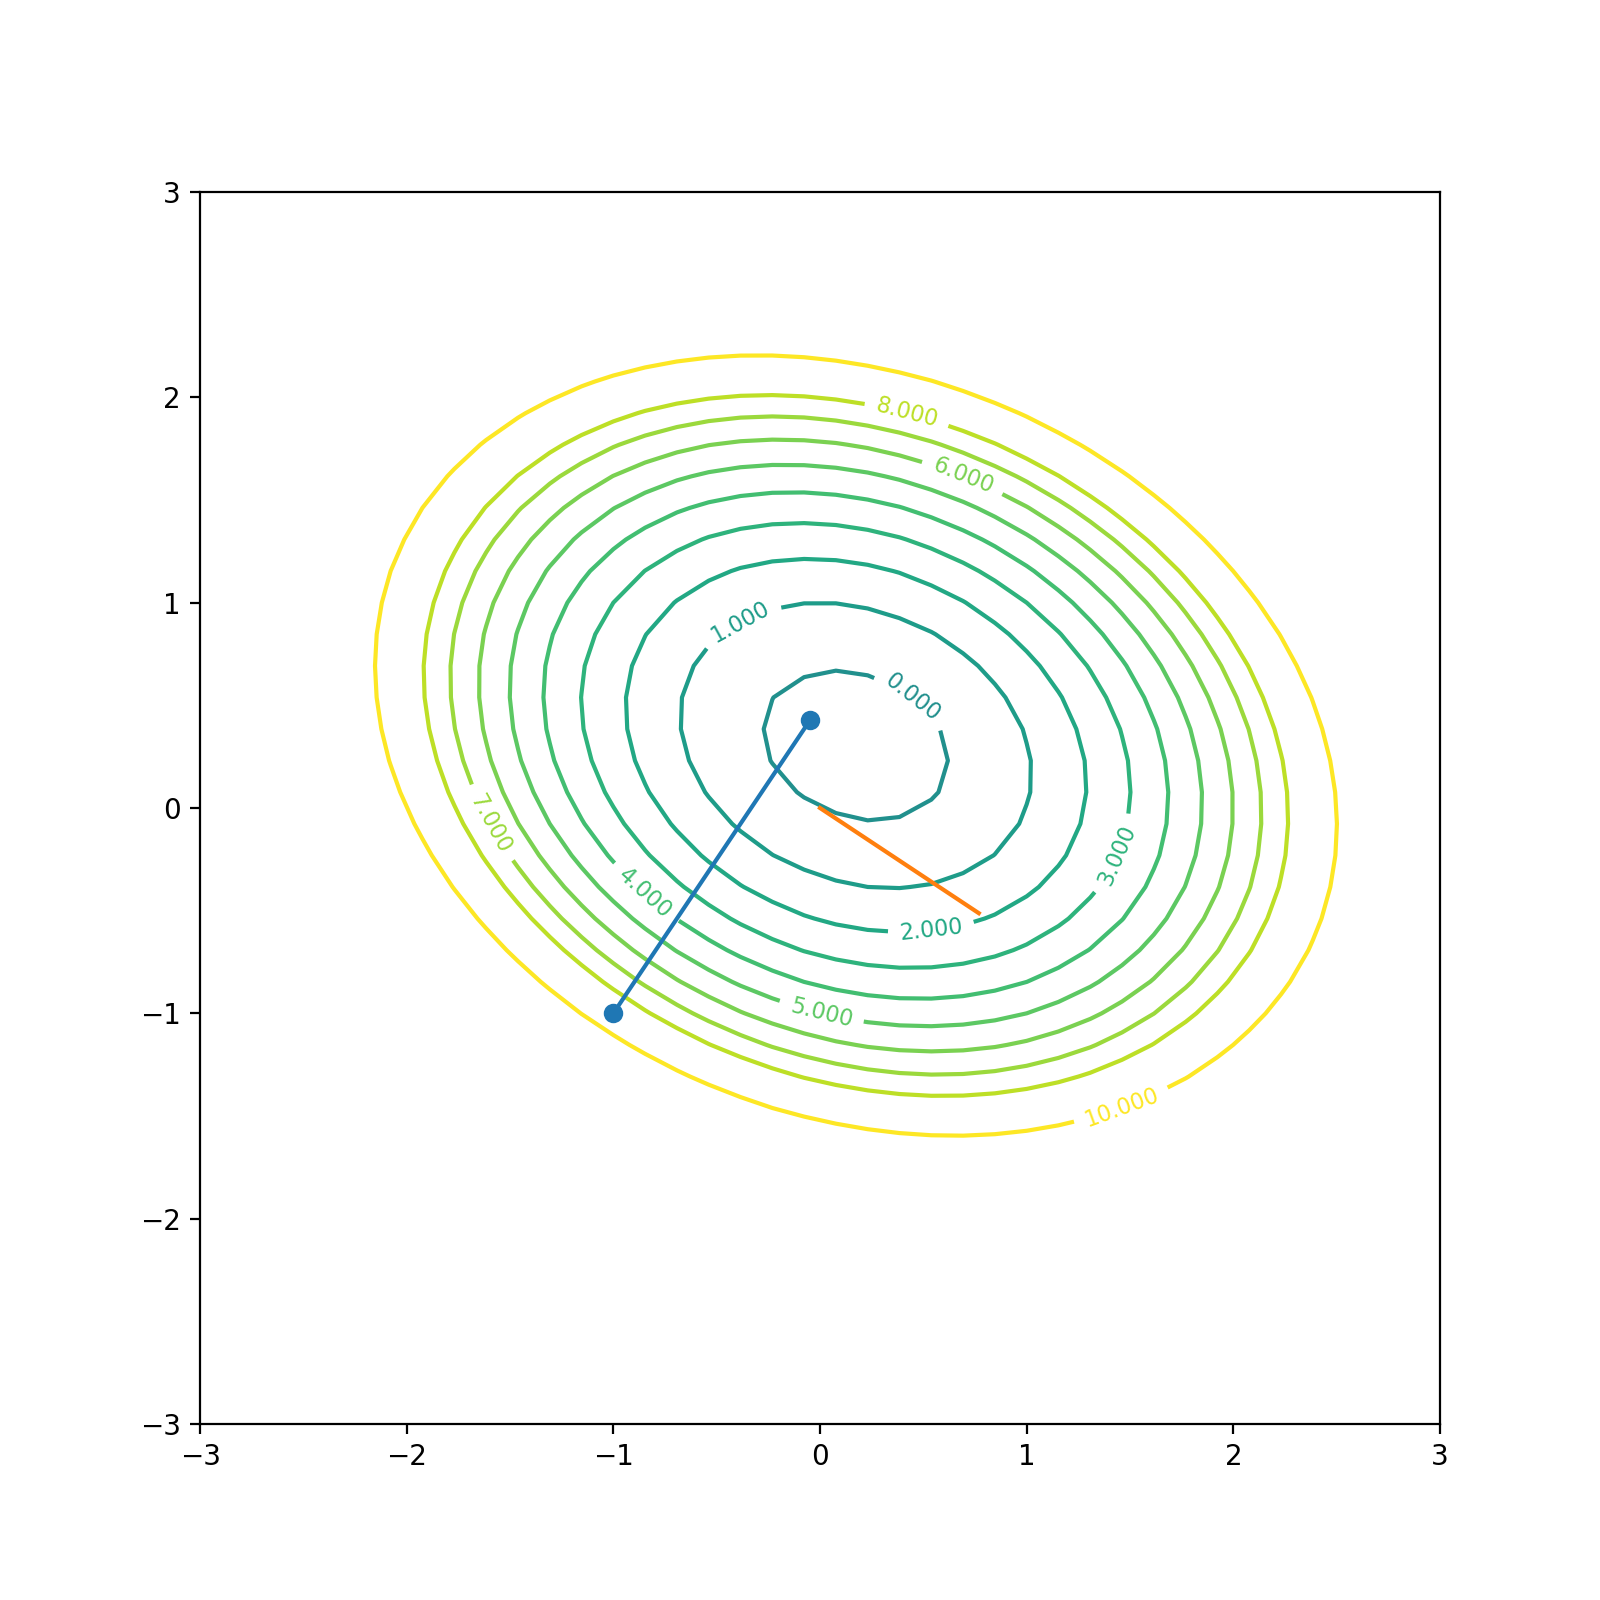

In [192]:
x = np.matrix([[-1.],[-1.]])
steps = [(-1.,-1.)]
r = b - A*x
d = r
deltanew = r.T * r
delta0 = deltanew
alpha = float(deltanew / float(d.T * A * d))
x = x + alpha * d
steps.append((x[0,0],x[1,0]))
r = b - A * x
contoursteps(x1,x2,zs,[(-1,-1),(x[0,0],x[1,0])])
plt.plot([0,r[0,0]],[0,r[1,0]])
plt.show()

In [193]:
d.T * A * r

matrix([[-5.37804878]])

<IPython.core.display.Javascript object>


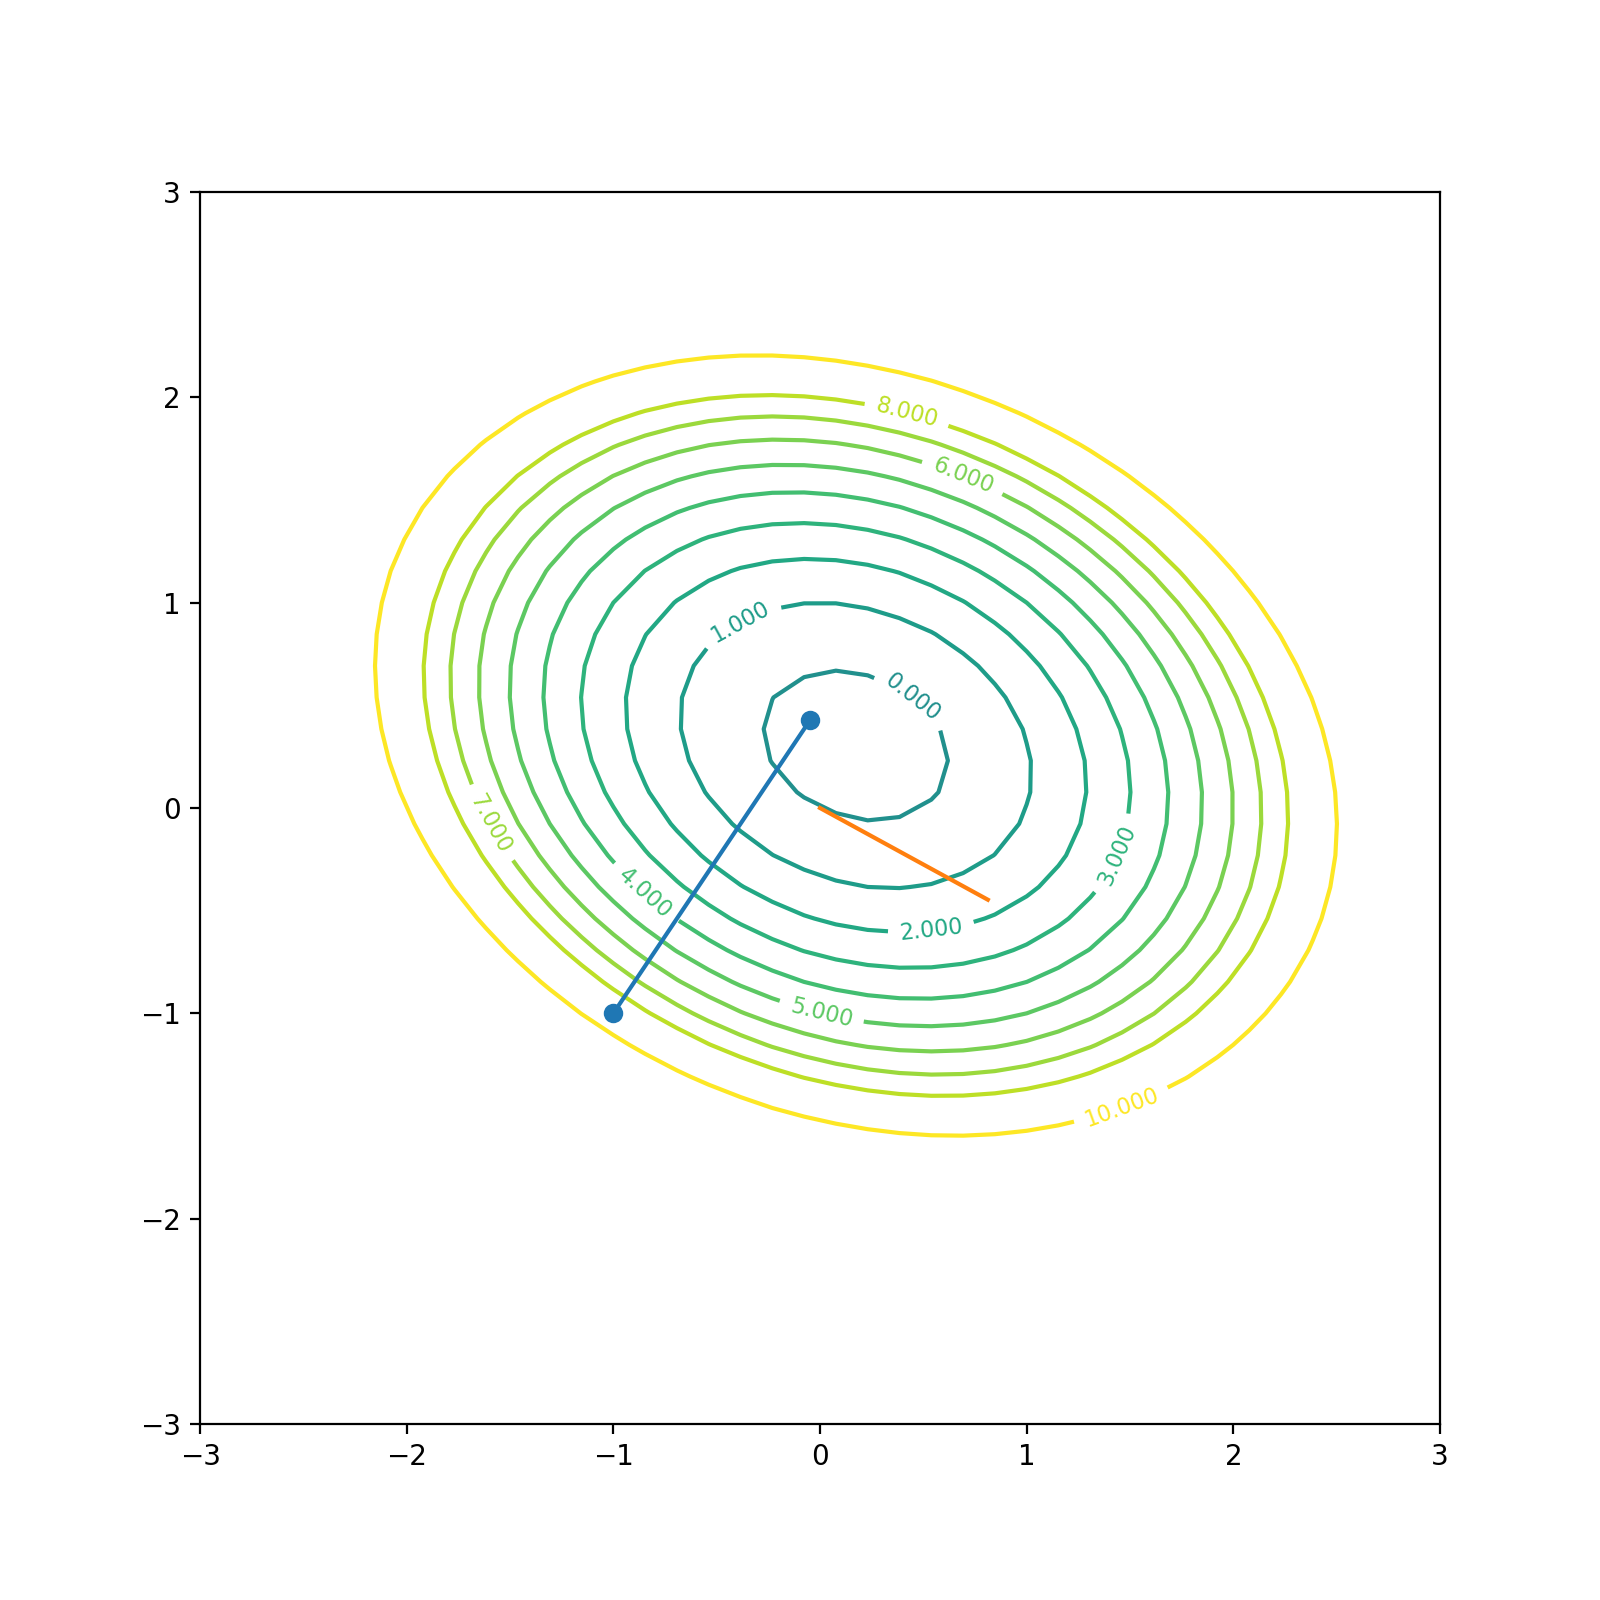

In [194]:
deltaold = deltanew
deltanew = r.T * r
beta = float(deltanew / deltaold)
oldd = d
d = r + beta*d
contoursteps(x1,x2,zs,[(-1,-1),(x[0,0],x[1,0])])
plt.plot([0,d[0,0]],[0,d[1,0]])
plt.show()

In [195]:
oldd.T * A * d

matrix([[3.19744231e-14]])

<IPython.core.display.Javascript object>


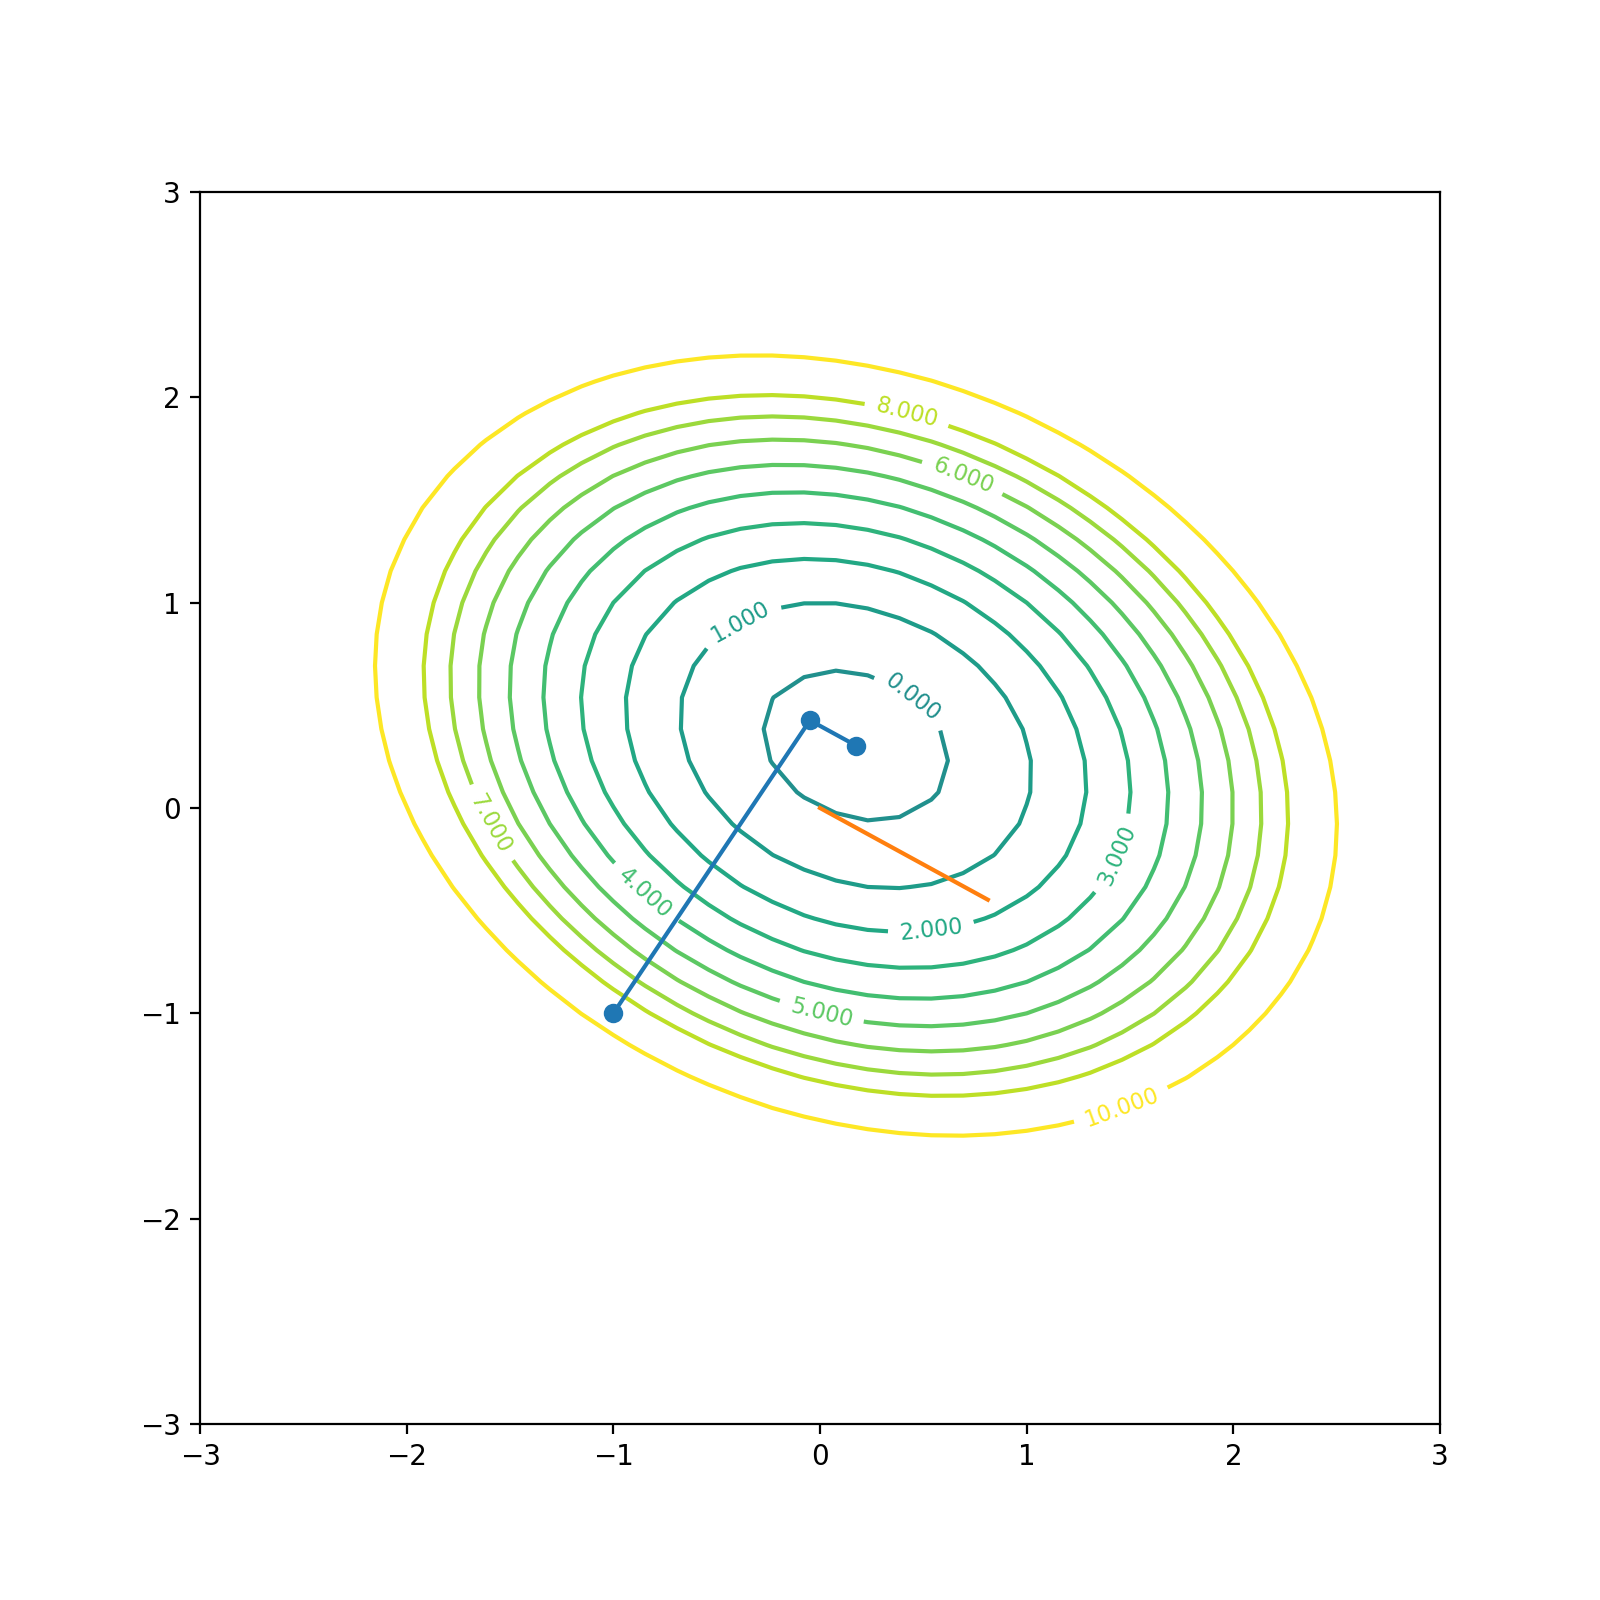

In [196]:
alpha = float(deltanew / (d.T*A*d))
x = x + alpha*d
oldr = r
steps.append((x[0,0],x[1,0]))
r = r - alpha*A*d
contoursteps(x1,x2,zs,steps)
plt.plot([0,d[0,0]],[0,d[1,0]])
plt.show()

In [197]:
oldr.T * r

matrix([[-5.68650817e-17]])